In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [69]:
# Define the Perceptron Class
class Perceptron:

    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            errors = 0
            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)
            self.misclassified_samples.append(errors)
            
    def f(self, x: np.array) -> float:
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        return np.where(self.f(x) >= 0, 1, -1)

In [70]:
# Start your main here ,read the iris data set
df = pd.read_csv('Iris.csv')

In [71]:
#Display the first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [72]:
#Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [73]:
#Basic Statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [74]:
#Checking for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [75]:
#Count of each species
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [76]:
#Correlation matrix
correlation = df.corr(numeric_only=True)
correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


In [77]:
#Extract the Label Column
y=df.iloc[:,4].values

Text(0.5, 0, 'Petal length in width (cm)')

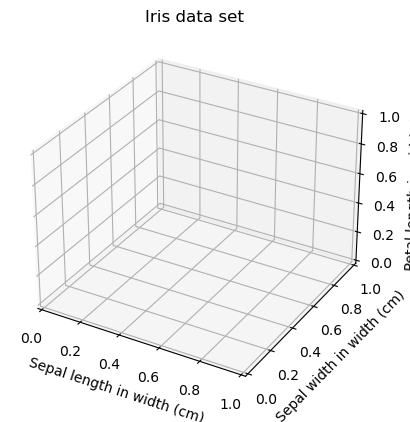

In [78]:
#Extract Features
x=df.iloc[:,4].values
fig=plt.figure()
ax=plt.axes(projection='3d')
ax.set_title("Iris data set")
ax.set_xlabel("Sepal length in width (cm)")
ax.set_ylabel("Sepal width in width (cm)")
ax.set_zlabel("Petal length in width (cm)")

In [79]:
# Select only 3 features for 3D plotting
x = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm']].values

C:\Users\admin\AppData\Local\Temp\ipykernel_15932\3736995519.py:8: UserWarning: You passed a edgecolor/edgecolors ('green') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(x[100:150,0], x[100:150,1], x[100:150,2], color='green', marker='x', s=20, edgecolor='green', label='Iris Virginica')


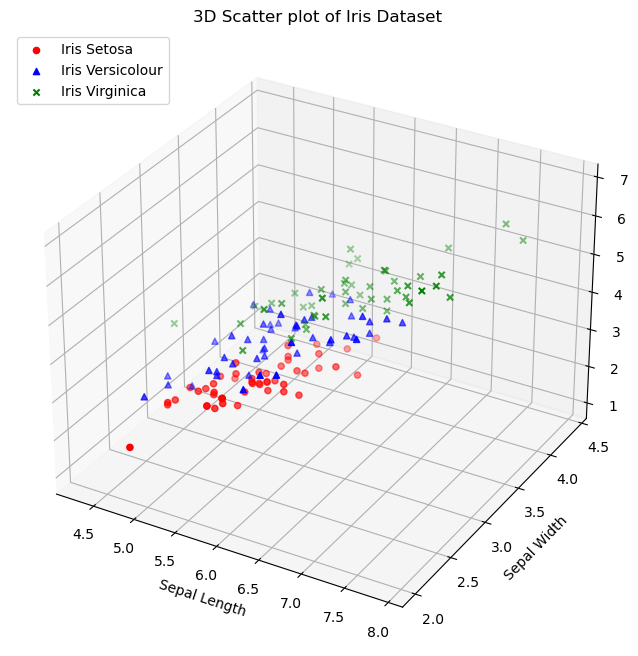

In [80]:
# Create a 3D plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# Plot each species
ax.scatter(x[:50,0], x[:50,1], x[:50,2], color='red', marker='o', s=20, edgecolor='red', label='Iris Setosa')
ax.scatter(x[50:100,0], x[50:100,1], x[50:100,2], color='blue', marker='^', s=20, edgecolor='blue', label='Iris Versicolour')
ax.scatter(x[100:150,0], x[100:150,1], x[100:150,2], color='green', marker='x', s=20, edgecolor='green', label='Iris Virginica')

# Labels
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.legend(loc='upper left')
plt.title('3D Scatter plot of Iris Dataset')
plt.show()


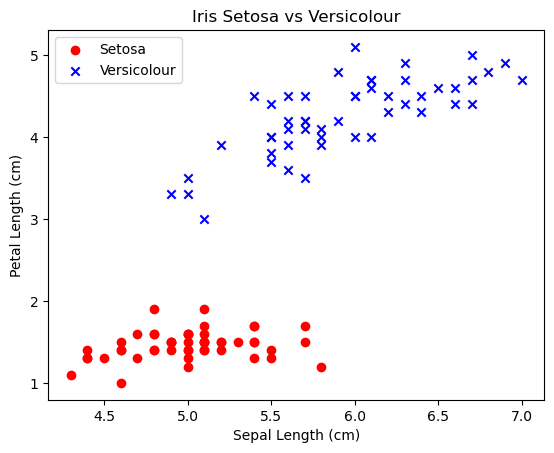

In [81]:
# Prepare features and labels
x = df[['SepalLengthCm', 'PetalLengthCm']].values
y = df['Species'].values

# Reduce to first 100 samples (Setosa and Versicolor only)
x = x[0:100, 0:2]
y = y[0:100]

# Plot Iris Setosa samples
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='Setosa')

# Plot Iris Versicolour samples
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='Versicolour')

# Labels and legend
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(loc='upper left')
plt.title("Iris Setosa vs Versicolour")
plt.show()

In [82]:
# map the labels to a binary integer value
y = np.where(y == 'Iris-setsa', 1, -1)

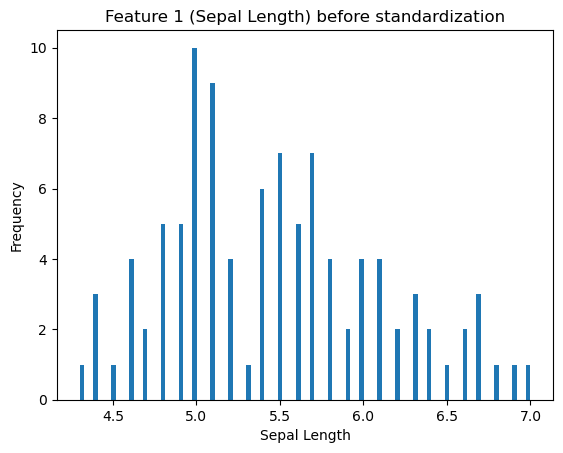

In [83]:
# Plot histogram before standardization
plt.hist(x[:, 0], bins=100)
plt.title("Feature 1 (Sepal Length) before standardization")
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.savefig("./before.png", dpi=300)
plt.show()

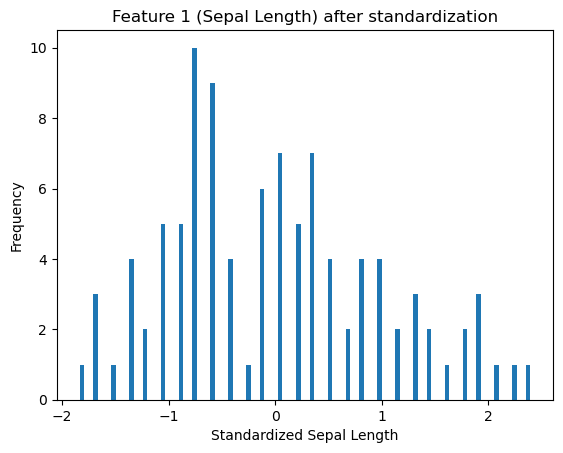

In [84]:
# Standardization of the input features
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

# Plot histogram after standardization (optional)
plt.hist(x[:, 0], bins=100)
plt.title("Feature 1 (Sepal Length) after standardization")
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Frequency')
plt.savefig("./after.png", dpi=300)
plt.show()

In [85]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [86]:
# Train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

In [87]:
# Evaluate the model
y_pred = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 100.0


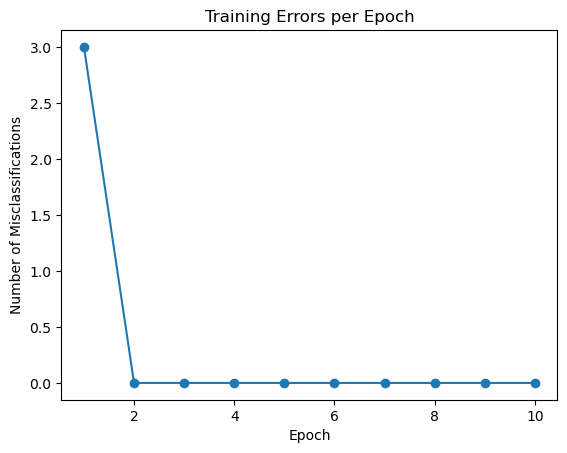

In [88]:
# Plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1), classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Misclassifications')
plt.title('Training Errors per Epoch')
plt.show()

In [89]:
# Evaluate the model (print accuracy after plot)
y_pred = classifier.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Accuracy: 100.0
